# NLP Project

In [201]:
import pandas as pd
import numpy as np

from requests import get
from bs4 import BeautifulSoup
import os

import seaborn as sns
import matplotlib.pyplot as plt

import prepare

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import nltk.sentiment
import re

import time



In [56]:
df = pd.read_json("data.json")

In [59]:
df.language.value_counts()

JavaScript          73
Python              27
Java                20
TypeScript          17
Go                  12
C++                 12
C                    6
Swift                5
Shell                4
HTML                 4
Vue                  4
Rust                 4
PHP                  4
CSS                  3
Kotlin               3
Ruby                 3
Objective-C          2
Clojure              2
Dart                 2
Jupyter Notebook     2
Assembly             1
OCaml                1
TeX                  1
Emacs Lisp           1
Haskell              1
C#                   1
Name: language, dtype: int64

In [76]:
(df.language.isnull()).sum()

33

In [85]:
df[df.readme_contents.str.contains("<p")]

,repo,language,readme_contents
0,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ..."
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot..."
4,sindresorhus/awesome,None,"<div align=""center"">\n\t<img width=""500"" heigh..."
7,ohmyzsh/ohmyzsh,Shell,"<p align=""center"">\n <img src=""https://s3.ama..."
8,kamranahmedse/developer-roadmap,None,\n![Web Developer Roadmap - 2020](https://i.im...
...,...,...,...
211,ZuzooVn/machine-learning-for-software-engineers,None,# Parcours d'Apprentissage de A à Z: Le Machin...
216,tailwindcss/tailwindcss,CSS,"<p>\n <a href=""https://tailwindcss.com/"" ta..."
223,markedjs/marked,JavaScript,"<a href=""https://marked.js.org"">\n <img width..."
230,nsqio/nsq,Go,"<p align=""center"">\n<img align=""left"" width=""1..."


# Acquire

Thanks to Zach, we already have the main function to acquire the data. The script runs through a list of repo's, and creates a new json file with the name of the repo, the programing language used, and the readme_contents.

In [87]:
df.head()

,repo,language,readme_contents
0,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ..."
1,EbookFoundation/free-programming-books,None,This page is available as an easy-to-read webs...
2,tensorflow/tensorflow,C++,"<div align=""center"">\n <img src=""https://www...."
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot..."
4,sindresorhus/awesome,None,"<div align=""center"">\n\t<img width=""500"" heigh..."


Now, we need to build a webscrapping function that can help us get more repo names, so we can run the script, and get their information. Our goal is to get 300 README's.

In [88]:
url = 'https://github.com/search?q=stars%3A%3E0&s=stars&type=Repositories'
headers = {'User-Agent': 'Codeup Bayes Data Science'} # codeup.com doesn't like our default user-agent
response = get(url, headers=headers)

In [89]:
soup = BeautifulSoup(response.content, 'html.parser')

In [90]:
article = soup.find_all('a', class_='v-align-middle')

In [91]:
article

[<a class="v-align-middle" data-hydro-click='{"event_type":"search_result.click","payload":{"page_number":1,"per_page":10,"query":"stars:&gt;0","result_position":1,"click_id":28457823,"result":{"id":28457823,"global_relay_id":"MDEwOlJlcG9zaXRvcnkyODQ1NzgyMw==","model_name":"Repository","url":"https://github.com/freeCodeCamp/freeCodeCamp"},"originating_url":"https://github.com/search?q=stars%3A%3E0&amp;s=stars&amp;type=Repositories","user_id":null}}' data-hydro-click-hmac="51803afd8693bb4b6109e8c6609869daf7189a6d9129bec0b1fc46cb79eac778" href="/freeCodeCamp/freeCodeCamp">freeCodeCamp/freeCodeCamp</a>,
 <a class="v-align-middle" data-hydro-click='{"event_type":"search_result.click","payload":{"page_number":1,"per_page":10,"query":"stars:&gt;0","result_position":2,"click_id":177736533,"result":{"id":177736533,"global_relay_id":"MDEwOlJlcG9zaXRvcnkxNzc3MzY1MzM=","model_name":"Repository","url":"https://github.com/996icu/996.ICU"},"originating_url":"https://github.com/search?q=stars%3A%3E0&

In [92]:
article[0]["href"].replace("/", '', 1)

'freeCodeCamp/freeCodeCamp'

## Web Scrapping Function

In [202]:
repo_names = []

# Loop to get repo names
for page_number in range(1,50):
    url = f"https://github.com/search?p={page_number}&q=stars%3A%3E0&s=stars&type=Repositories"
    headers = {'User-Agent': 'Codeup Bayes Data Science'}
    response = get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    repos = soup.find_all('a', class_='v-align-middle')
    time.sleep(10)

    
    for repo_number in range(len(repos)):
        repo_name = repos[repo_number]["href"].replace("/", '', 1)
        repo_names.append(repo_name)

In [205]:
s = pd.DataFrame(repo_names, columns=["repo_name"])

In [208]:
s.to_csv("repo_names.csv")

In [210]:
s.repo_name.unique()

array(['freeCodeCamp/freeCodeCamp', '996icu/996.ICU', 'vuejs/vue',
       'EbookFoundation/free-programming-books', 'facebook/react',
       'tensorflow/tensorflow', 'twbs/bootstrap', 'sindresorhus/awesome',
       'getify/You-Dont-Know-JS', 'jwasham/coding-interview-university',
       'ohmyzsh/ohmyzsh', 'kamranahmedse/developer-roadmap',
       'github/gitignore', 'CyC2018/CS-Notes',
       'donnemartin/system-design-primer', 'microsoft/vscode',
       'airbnb/javascript', 'flutter/flutter', 'd3/d3', 'torvalds/linux',
       'facebook/react-native', 'jackfrued/Python-100-Days',
       'public-apis/public-apis', 'electron/electron',
       'vinta/awesome-python', 'Snailclimb/JavaGuide',
       'facebook/create-react-app', 'jlevy/the-art-of-command-line',
       'TheAlgorithms/Python', 'danistefanovic/build-your-own-x',
       'axios/axios', 'golang/go', 'trekhleb/javascript-algorithms',
       'nodejs/node', 'justjavac/free-programming-books-zh_CN',
       'ytdl-org/youtube-dl', 'anim

In [86]:
# Update existing csv file with most up to date list
s = pd.DataFrame(repo_names, columns=["repo_name"])
s.to_csv("repo_names.csv", mode='a', header=True)
repo_test = pd.read_csv("repo_names.csv")
repo_list = repo_test.repo_name.fillna(repo_test["0"])
repo_list.to_csv("repo_names.csv")

In [211]:
REPO = ['freeCodeCamp/freeCodeCamp', '996icu/996.ICU', 'vuejs/vue',
       'EbookFoundation/free-programming-books', 'facebook/react',
       'tensorflow/tensorflow', 'twbs/bootstrap', 'sindresorhus/awesome',
       'getify/You-Dont-Know-JS', 'jwasham/coding-interview-university',
       'ohmyzsh/ohmyzsh', 'kamranahmedse/developer-roadmap',
       'github/gitignore', 'CyC2018/CS-Notes',
       'donnemartin/system-design-primer', 'microsoft/vscode',
       'airbnb/javascript', 'flutter/flutter', 'd3/d3', 'torvalds/linux',
       'facebook/react-native', 'jackfrued/Python-100-Days',
       'public-apis/public-apis', 'electron/electron',
       'vinta/awesome-python', 'Snailclimb/JavaGuide',
       'facebook/create-react-app', 'jlevy/the-art-of-command-line',
       'TheAlgorithms/Python', 'danistefanovic/build-your-own-x',
       'axios/axios', 'golang/go', 'trekhleb/javascript-algorithms',
       'nodejs/node', 'justjavac/free-programming-books-zh_CN',
       'ytdl-org/youtube-dl', 'animate-css/animate.css',
       'kubernetes/kubernetes', 'tensorflow/models', 'microsoft/terminal',
       'iluwatar/java-design-patterns', 'mui-org/material-ui',
       'moby/moby', '30-seconds/30-seconds-of-code',
       'PanJiaChen/vue-element-admin', 'MisterBooo/LeetCodeAnimation',
       'avelino/awesome-go', 'vuejs/awesome-vue', 'webpack/webpack',
       'jquery/jquery', 'spring-projects/spring-boot',
       'Semantic-Org/Semantic-UI', 'tonsky/FiraCode',
       'typicode/json-server', 'netdata/netdata', 'jakubroztocil/httpie',
       'rails/rails', 'xingshaocheng/architect-awesome',
       'goldbergyoni/nodebestpractices', 'ElemeFE/element',
       'h5bp/html5-boilerplate', 'opencv/opencv', 'lodash/lodash',
       'awesome-selfhosted/awesome-selfhosted',
       'josephmisiti/awesome-machine-learning', 'kdn251/interviews',
       'gatsbyjs/gatsby', 'h5bp/Front-end-Developer-Interview-Questions',
       'gohugoio/hugo', 'moment/moment', 'doocs/advanced-java',
       'bitcoin/bitcoin', 'ansible/ansible', 'antirez/redis',
       'yangshun/tech-interview-handbook', 'ReactiveX/RxJava',
       'labuladong/fucking-algorithm', 'nvm-sh/nvm',
       'resume/resume.github.com', 'ionic-team/ionic',
       'scikit-learn/scikit-learn', 'papers-we-love/papers-we-love',
       'ReactTraining/react-router', 'thedaviddias/Front-End-Checklist',
       'jekyll/jekyll', 'google/material-design-icons', 'jgthms/bulma',
       'awesomedata/awesome-public-datasets', 'pytorch/pytorch',
       'psf/requests', 'gothinkster/realworld',
       'protocolbuffers/protobuf', 'meteor/meteor',
       'mtdvio/every-programmer-should-know', 'kelseyhightower/nocode',
       'apache/incubator-echarts', 'necolas/normalize.css',
       'gin-gonic/gin', 'yarnpkg/yarn',
       'scutan90/DeepLearning-500-questions',
       'wasabeef/awesome-android-ui', 'jaywcjlove/awesome-mac',
       'NARKOZ/hacker-scripts', 'Dogfalo/materialize', 'google/guava',
       'aymericdamien/TensorFlow-Examples',
       'spring-projects/spring-framework',
       'minimaxir/big-list-of-naughty-strings', 'scrapy/scrapy',
       'Hack-with-Github/Awesome-Hacking', 'square/okhttp',
       'enaqx/awesome-react', 'neovim/neovim', 'nwjs/nw.js',
       'FreeCodeCampChina/freecodecamp.cn', 'babel/babel',
       'prettier/prettier', 'android/architecture-samples',
       'fatedier/frp', 'ryanmcdermott/clean-code-javascript',
       'serverless/serverless', 'sindresorhus/awesome-nodejs',
       'parcel-bundler/parcel', 'square/retrofit', 'impress/impress.js',
       'juliangarnier/anime', 'ripienaar/free-for-dev', 'grafana/grafana',
       'macrozheng/mall', 'nodejs/node-v0.x-archive', 'x64dbg/x64dbg',
       'ziishaned/learn-regex', 'vsouza/awesome-ios',
       'astaxie/build-web-application-with-golang', 'ColorlibHQ/AdminLTE',
       'tesseract-ocr/tesseract', 'gogs/gogs',
       'ageitgey/face_recognition',
       'MaximAbramchuck/awesome-interview-questions', 'sveltejs/svelte',
       'TryGhost/Ghost', 'k88hudson/git-flight-rules',
       'Alamofire/Alamofire', 'home-assistant/core',
       'prakhar1989/awesome-courses', 'vercel/hyper',
       'bailicangdu/vue2-elm', 'soimort/you-get',
       'tuvtran/project-based-learning', 'azl397985856/leetcode',
       'AFNetworking/AFNetworking', 'git/git', 'syncthing/syncthing',
       'adobe/brackets', 'Genymobile/scrcpy', 'etcd-io/etcd',
       'facebook/jest', 'prometheus/prometheus', 'karan/Projects',
       'mozilla/pdf.js', 'PhilJay/MPAndroidChart', 'discourse/discourse',
       'google/material-design-lite', 'justjavac/awesome-wechat-weapp',
       'python/cpython', 'godotengine/godot', '521xueweihan/HelloGitHub',
       'blueimp/jQuery-File-Upload', 'deepfakes/faceswap', 'hexojs/hexo',
       'BVLC/caffe', 'mermaid-js/mermaid', 'xitu/gold-miner',
       'preactjs/preact', 'grpc/grpc', 'open-guides/og-aws',
       'floodsung/Deep-Learning-Papers-Reading-Roadmap', 'apache/spark',
       'alex/what-happens-when', 'binhnguyennus/awesome-scalability',
       'ethereum/go-ethereum', 'Kong/kong',
       'kamranahmedse/design-patterns-for-humans',
       'DefinitelyTyped/DefinitelyTyped', 'Solido/awesome-flutter',
       'huggingface/transformers', 'Leaflet/Leaflet',
       'shadowsocks/ShadowsocksX-NG', 'Homebrew/legacy-homebrew',
       'jashkenas/backbone', 'ariya/phantomjs', 'lukehoban/es6features',
       'Avik-Jain/100-Days-Of-ML-Code',
       'exacity/deeplearningbook-chinese', 'zenorocha/clipboard.js',
       'foundation/foundation-sites', 'huginn/huginn', 'videojs/video.js',
       'testerSunshine/12306', 'JuliaLang/julia', 'nuxt/nuxt.js',
       'isocpp/CppCoreGuidelines', 'RocketChat/Rocket.Chat',
       'certbot/certbot', 'codepath/android_guides', 'quilljs/quill',
       'tastejs/todomvc', 'bilibili/ijkplayer', 'caolan/async',
       'bayandin/awesome-awesomeness', 'vuetifyjs/vuetify',
       'fffaraz/awesome-cpp', 'mathiasbynens/dotfiles', 'symfony/symfony',
       'facebookresearch/Detectron', 'google-research/bert',
       'pi-hole/pi-hole', 'freeCodeCamp/devdocs', 'fxsjy/jieba',
       'istio/istio', 'raywenderlich/swift-algorithm-club',
       'alacritty/alacritty', 'JakeWharton/butterknife',
       'ant-design/ant-design-pro',
       'shengxinjing/programmer-job-blacklist', 'apachecn/AiLearning',
       'pandas-dev/pandas', 'danielmiessler/SecLists',
       'aosabook/500lines', 'getsentry/sentry', 'faif/python-patterns',
       'akullpp/awesome-java', 'square/leakcanary',
       'crossoverJie/JCSprout', 'localstack/localstack', 'wg/wrk',
       'request/request', 'Tencent/weui', 'dylanaraps/pure-bash-bible',
       'nylas/nylas-mail', 'google/styleguide', 'select2/select2',
       'Modernizr/Modernizr', 'carbon-app/carbon', 'FiloSottile/mkcert',
       'madewithml/basics', 'yangshun/front-end-interview-handbook',
       'ngosang/trackerslist', 'johnpapa/angular-styleguide',
       'Alvin9999/new-pac', 'houshanren/hangzhou_house_knowledge',
       'astaxie/beego', 'fzaninotto/Faker', 'nvie/gitflow', 'iina/iina',
       'vuejs/vuex', 'nolimits4web/swiper', 'standard/standard',
       'ZuzooVn/machine-learning-for-software-engineers',
       'jakevdp/PythonDataScienceHandbook', 'Marak/faker.js',
       'pingcap/tidb', 'netty/netty', 'ziadoz/awesome-php',
       'rethinkdb/rethinkdb', 'github/fetch', 'tailwindcss/tailwindcss',
       'dkhamsing/open-source-ios-apps',
       'herrbischoff/awesome-macos-command-line', 'jiahaog/nativefier',
       'angular/angular-cli', 'alibaba/fastjson', 'florinpop17/app-ideas',
       'ajaxorg/ace', 'naptha/tesseract.js', 'emberjs/ember.js',
       'kelseyhightower/kubernetes-the-hard-way', 'agalwood/Motrix',
       'Polymer/polymer', 'alibaba/arthas', 'hammerjs/hammer.js',
       'Automattic/mongoose', 'openai/gym', 'fighting41love/funNLP',
       'pure-css/pure', 'heartcombo/devise', 'google/leveldb',
       'fouber/blog', 'satwikkansal/wtfpython', 't4t5/sweetalert',
       'facebook/flow', 'Homebrew/brew', 'unknwon/the-way-to-go_ZH_CN',
       'gitlabhq/gitlabhq', 'hashicorp/terraform', 'harvesthq/chosen',
       'minio/minio', 'ReactiveX/rxjs', 'cheeriojs/cheerio',
       'sequelize/sequelize', 'dcloudio/uni-app', 'webtorrent/webtorrent',
       'mobxjs/mobx', 'remy/nodemon', 'niklasvh/html2canvas',
       'rapid7/metasploit-framework', 'akveo/ngx-admin',
       'cypress-io/cypress', 'redux-saga/redux-saga', 'pypa/pipenv',
       'littlecodersh/ItChat', 'balderdashy/sails',
       'scwang90/SmartRefreshLayout',
       'terryum/awesome-deep-learning-papers', 'tootsuite/mastodon',
       'alibaba/flutter-go', 'drone/drone', 'StreisandEffect/streisand',
       'eugenp/tutorials', 'ocornut/imgui',
       'NationalSecurityAgency/ghidra', 'rstacruz/nprogress',
       'ctripcorp/apollo', 'wagoodman/dive', 'microsoft/monaco-editor',
       'SortableJS/Sortable', 'koalaman/shellcheck',
       'FezVrasta/bootstrap-material-design', 'JedWatson/react-select',
       'aria2/aria2', 'kriasoft/react-starter-kit', 'syl20bnr/spacemacs',
       'CymChad/BaseRecyclerViewAdapterHelper', 'gorhill/uBlock',
       'SwiftGGTeam/the-swift-programming-language-in-chinese',
       'powerline/fonts', 'byoungd/English-level-up-tips-for-Chinese',
       'mochajs/mocha', 'guzzle/guzzle', 'typeorm/typeorm',
       'markerikson/react-redux-links', 'BradLarson/GPUImage',
       'hashicorp/consul', 'usablica/intro.js', 'dhg/Skeleton',
       'ruanyf/jstraining', 'parse-community/parse-server',
       'Seldaek/monolog', 'jaredhanson/passport', 'd2l-ai/d2l-zh',
       'CMU-Perceptual-Computing-Lab/openpose', 'vuejs/vue-devtools',
       'keon/algorithms', 'jorgebucaran/hyperapp', 'docker/compose',
       'github/hub', 'obsproject/obs-studio', 'airbnb/lottie-ios',
       'SwiftyJSON/SwiftyJSON', 'railsware/upterm',
       'PowerShell/PowerShell', 'pyenv/pyenv', 'hankcs/HanLP',
       'reduxjs/react-redux', 'pcottle/learnGitBranching',
       'bcit-ci/CodeIgniter', 'fastai/fastai', 'mongodb/mongo',
       'tj/commander.js', 'avajs/ava', 'google/gson',
       'veggiemonk/awesome-docker', 'xi-editor/xi-editor',
       'balena-io/etcher', 'mqyqingfeng/Blog', 'doczjs/docz',
       'nlohmann/json', 'inconshreveable/ngrok', 'jinzhu/gorm',
       'NativeScript/NativeScript', 'google/web-starter-kit',
       'donnemartin/data-science-ipython-notebooks', 'ReactiveX/RxSwift',
       'postcss/autoprefixer']

# Prepare

In [95]:
df = prepare.prep_readme_data(df)

In [111]:
df = df[(~df.readme_contents.str.contains("<p ")) & (~df.readme_contents.str.contains("<div "))].dropna()

# Explore

Text(0, 0.5, 'Programming Language')

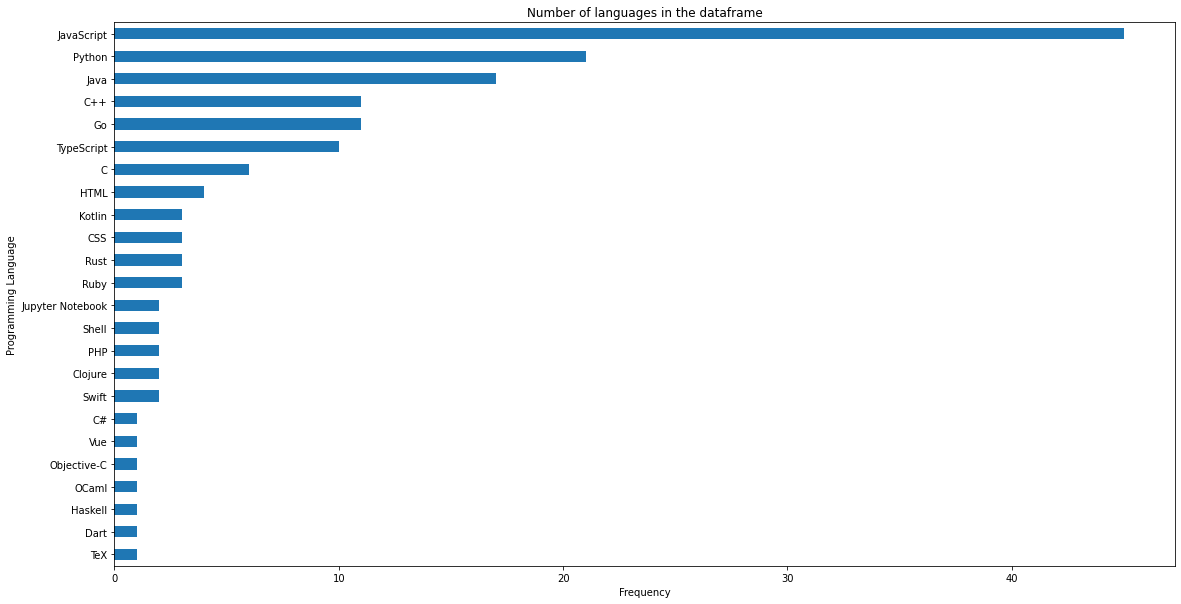

In [126]:
df.language.value_counts().sort_values(ascending=True).plot.barh(figsize=(19,10))
plt.title("Number of languages in the dataframe")
plt.xlabel("Frequency")
plt.ylabel("Programming Language")

In [133]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text: str) -> list:
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (text.encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split() # tokenization
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [145]:
all_words = clean(' '.join(df.clean_lemmatized))
python_words = clean(' '.join(df[df.language == 'Python'].clean_lemmatized))
javascript_words = clean(' '.join(df[df.language == 'JavaScript'].clean_lemmatized))
java_words = clean(' '.join(df[df.language == 'Java'].clean_lemmatized))
c_plus_plus_words = clean(' '.join(df[df.language == 'C++'].clean_lemmatized))

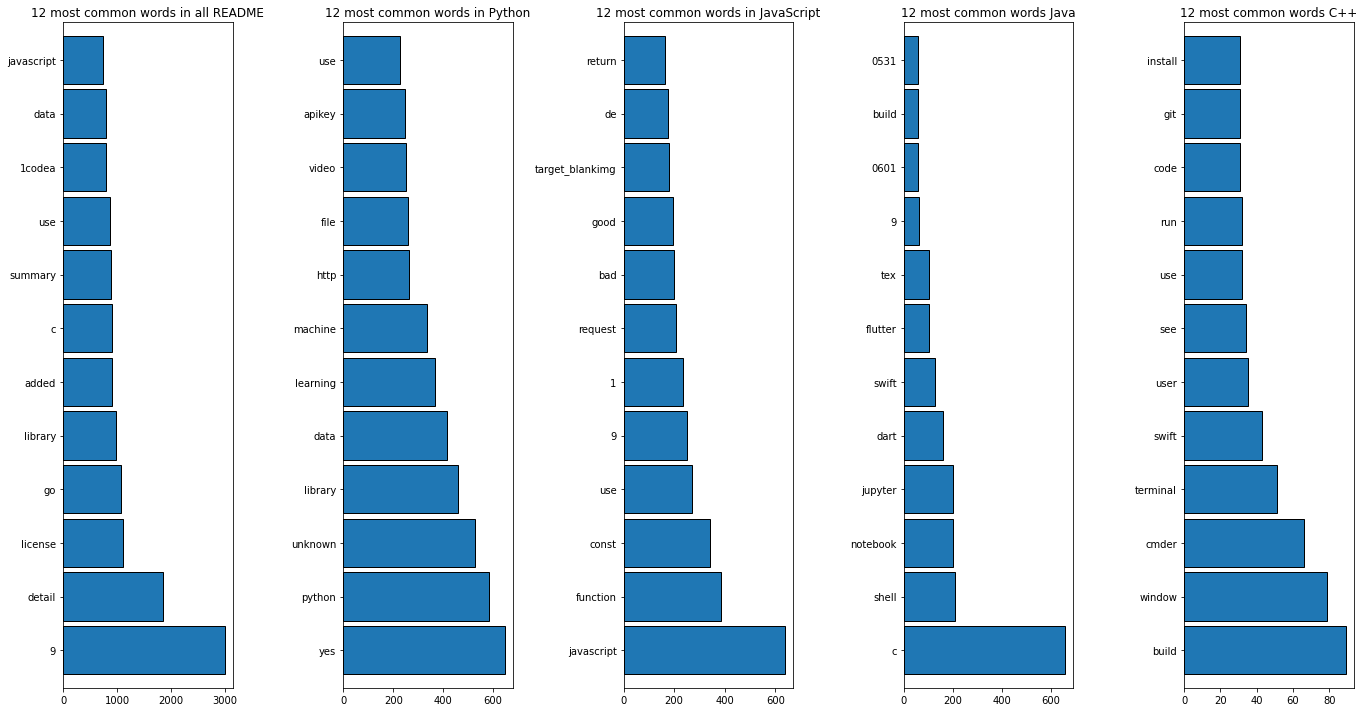

In [161]:
figure, axes = plt.subplots(1, 5, figsize=(19,15))

pd.Series(all_words).value_counts().head(12).plot.barh(width=.9, ec='black', title='12 most common words in all README', figsize=(19,10), ax=axes[0])
pd.Series(python_words).value_counts().head(12).plot.barh(width=.9, ec='black', title='12 most common words in Python', figsize=(19,10), ax=axes[1])
pd.Series(javascript_words).value_counts().head(12).plot.barh(width=.9, ec='black', title='12 most common words in JavaScript', figsize=(19,10), ax=axes[2])
pd.Series(java_words).value_counts().head(12).plot.barh(width=.9, ec='black', title='12 most common words Java', figsize=(19,10), ax=axes[3])
pd.Series(c_plus_plus_words).value_counts().head(12).plot.barh(width=.9, ec='black', title='12 most common words C++', figsize=(19,10), ax=axes[4])

# plt.suptitle("Most Common Words in ReadME")
plt.tight_layout()

In [188]:
def idf(word):
    return df.shape[0] / (df.clean_lemmatized.str.contains(word)).sum()

In [220]:
idf("script")

1.6559139784946237

In [179]:
test = df.clean_lemmatized.to_dict()

In [215]:
new_words = []
for word in all_words:
    if len(word) < 10:
        new_words.append(word)
    

In [216]:
# put the unique words into a data frame
(pd.DataFrame(dict(word=new_words))
 # calculate the idf for each word
 .assign(idf=lambda df: df.word.apply(idf))
 # sort the data for presentation purposes
 .set_index('word')
 .sort_values(by='idf', ascending=False)
 .head(5))

,idf
word,
_ymp4,inf
captchas,154.0
unspaced,154.0
assumenda,154.0
doloribus,154.0


In [218]:
pd.DataFrame(dict(word=new_words))

,word
0,airbnb
1,style
2,guide
3,mostly
4,approach
...,...
139162,must
139163,ruby
139164,rack
139165,gem


In [199]:
# put the unique words into a data frame
(pd.DataFrame(dict(word=python_words))
 # calculate the idf for each word
 .assign(idf=lambda df: df.word.apply(idf))
 # sort the data for presentation purposes
 .set_index('word')
 .sort_values(by='idf', ascending=False)
 .head(5))

,idf
word,
_ymp4,inf
gopherdatahttpsgithubcomgopherdataresourcestreemastertooling,154.0
onlyformat,154.0
namepythongeneralpurposea,154.0
modelling,154.0
